### Dice with 3 edges

Assume we have dice with three sides (1,2,3) and we want to make bayesian inference on the probailities of each side observing the data.

Standard 2-simplex $\Delta_2$:
<img src="https://upload.wikimedia.org/wikipedia/commons/3/38/2D-simplex.svg" alt="link" style="width: 250px;"/>

Likelihood:
$$
p(x|\theta) \propto \theta_1 ^ {n_1} \theta_2 ^ {n_2} \theta_3 ^ {n_3}, \quad \theta\in\Delta_2, \quad\theta_3 = 1-\theta_1-\theta_2
$$

Prior:
$$
\theta \sim \mathrm{Dirichlet} (\alpha_1,\alpha_2,\alpha_3), \quad \theta\in\Delta_2
$$

Posterior:
$$
\theta|x \sim \mathrm{Dirichlet} (\alpha_1 + n_1, \alpha_2+ n_2, \alpha_3 + n_3), \quad \theta\in\Delta_2
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import dirichlet

# https://gist.github.com/tboggs/8778945
from simplex_plots import draw_pdf_contours, plot_points

In [2]:
# ground truth values of theta (we're trying to estimate them)
theta_gt = [0.8, 0.1, 0.1]

# generate data
np.random.seed(777)
x = np.random.multinomial(1, theta_gt)
x

array([1, 0, 0])

In [3]:
alpha = [1, 1+5, 1+5]
prior = dirichlet(alpha)

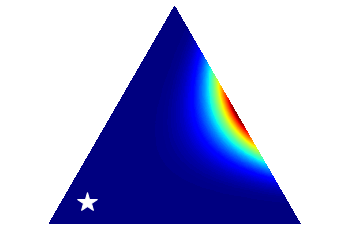

In [4]:
draw_pdf_contours(prior, subdiv=5, point=theta_gt)

In [5]:
posterior = dirichlet(alpha + x)

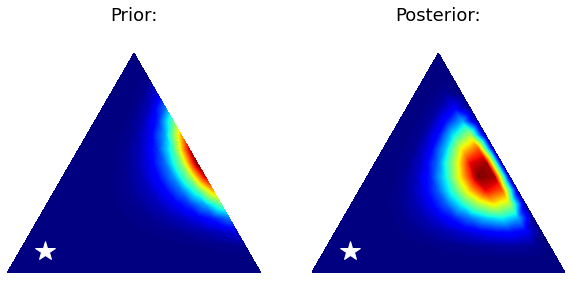

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Prior:', fontsize=18)
draw_pdf_contours(prior, subdiv=4, point=theta_gt)
plt.subplot(1, 2, 2)
plt.title('Posterior:', fontsize=18)
draw_pdf_contours(posterior, subdiv=4, point=theta_gt)

In [7]:
# generate more data
y = np.random.multinomial(1, theta_gt)
y

array([1, 0, 0])

In [8]:
prior = posterior
posterior = dirichlet(alpha + x + y)

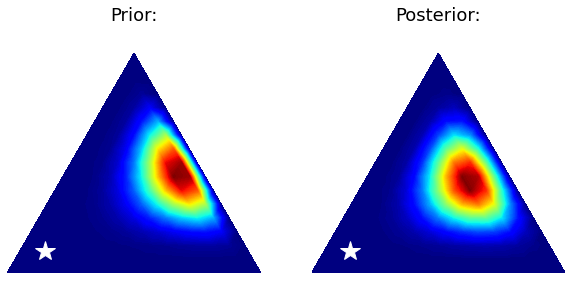

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Prior:', fontsize=18)
draw_pdf_contours(prior, subdiv=4, point=theta_gt)
plt.subplot(1, 2, 2)
plt.title('Posterior:', fontsize=18)
draw_pdf_contours(posterior, subdiv=4, point=theta_gt)

In [10]:
# generate more data
z = np.random.multinomial(50, theta_gt)
z

array([44,  3,  3])

In [11]:
prior = posterior
posterior = dirichlet(alpha + x + y + z)

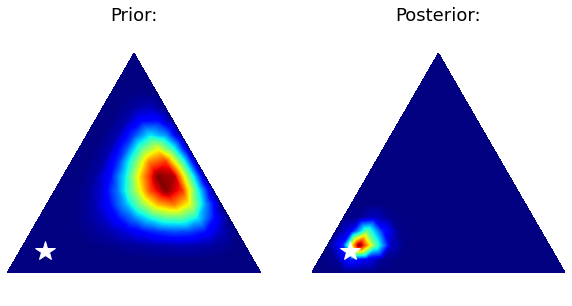

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Prior:', fontsize=18)
draw_pdf_contours(prior, subdiv=4, point=theta_gt)
plt.subplot(1, 2, 2)
plt.title('Posterior:', fontsize=18)
draw_pdf_contours(posterior, subdiv=4, point=theta_gt)